# Поиск месячных закономерностей в доходностях

В этом файле мы ищем закономерности для обыкновенных акций и фьючерса *Сбербанка* в зависимости от месяца года. (Период 01.01.2010-31.12.2019. Загружены с сайта Финама).

Алгоритм следующий:
1. [Импорт данных](#1.-Импорт-данных.);
2. [График цены](#2.-График-цены.);
3. [Процентное изменение цены БА для каждого месяца](#3.-Процентное-изменение-цены-БА-для-каждого-месяца.);
4. [Медиана доходности за определенный месяц](#4.-Медиана-доходности-за-определенный-месяц.);
5. [Доходность за определенный месяц](#5.-Доходность-за-определенный-месяц.);
6. [Вычисление количества прибыльных и убыточных периодов](#6.-Вычисление-количества-прибыльных-и-убыточных-периодов.);
7. [Расстояние между High, Open, Low](#7.-Расстояние-между-High,-Open,-Low.);
8. [Уровни изменений цены](#8.-Уровни-изменений-цены.).

## 1. Импорт данных.

Импортируем необходимые модули и присваиваем переменным названия файлов, содержащих данные по акции и фьючерсу.  
Также называем столбцы в выходных данных

In [1]:
# Импортируем пакет Pandas
import pandas as pd

# Импорт numpy пакета
import numpy as np

# Импортируем пакет matplotlib для графиков
import matplotlib as mpl
import matplotlib.pyplot as plt
large = 32; med = 24; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': small,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': large,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

# Название компании для отображения на графике
title_name = 'Сбербанк'

# Имена файлов.
file_name_ao = 'SBER_100101_191231_month.csv' # Данные скачены с сайта Финама.
file_name_fut = 'SPFB.SBRF_100101_191231_month_gluing.csv'

# Папка с котировками
path = 'quote/'

# Названия столбцов для новой таблицы
columns = ['close_share', 'close_fut']
columns_ao = ['time','open','high','low','close','vol']

Пример данных для загрузки:

![Пример загрузки](img/finam_sber.png)

Читаем данные с помощью функции *read_csv*. В качестве аргумента подставляем:  
- имя файла, 
- разделитель - точка с запятой, 
- индекс - первый столбец, 
- дата - столбец 'DATE' (можно было вместо 'DATE' поставить True, т.к. это индекс)

Создаем новый dataframe с ценами закрытия акции и фьючерса, при этом заполняем пустые значения в строке значением предыдущей строчки (метод *ffill*).

Выделяем *месяц* в отдельный столбец.

In [2]:
# Чтение данных из CSV файла
df_share = pd.read_csv(path+file_name_ao, sep=";", index_col=0, parse_dates=['<DATE>'])
df_fut = pd.read_csv(path+file_name_fut, sep=";", index_col=0, parse_dates=['<DATE>'])

# Создание нового dataframe с двумя столбцами: цена акции на закрытие и цена фьючерса на закрытие.
df = pd.DataFrame({'col1':df_share['<CLOSE>'],'col2':df_fut['<CLOSE>'], })
df = df.fillna(method='ffill')
df_share = df_share.fillna(method='ffill')

# Даем имена столбцам.
df.columns = columns
df.index.names = ['Date']

df_share.columns = columns_ao
df_share.index.names = ['Date']
df_share['month'] = df.index.strftime('%m')
#df.index = pd.to_datetime(df.index)

# Сохраняем месяц в соответствующий новый столбец
df['month'] = df.index.strftime('%b')

df.tail(17)

,close_share,close_fut,month
Date,,,
2018-09-01,203.32,20636.0,Sep
2018-10-01,189.80,19148.0,Oct
2018-11-01,194.00,19631.0,Nov
2018-12-01,186.34,18920.0,Dec
2019-01-01,217.90,22000.0,Jan
2019-02-01,207.80,20830.0,Feb
2019-03-01,214.42,20375.0,Mar
2019-04-01,225.17,21545.0,Apr
2019-05-01,233.24,21815.0,May


## 2. График цены.

Рисуем график цены (по закрытию) акции фьючерса для данной компании.

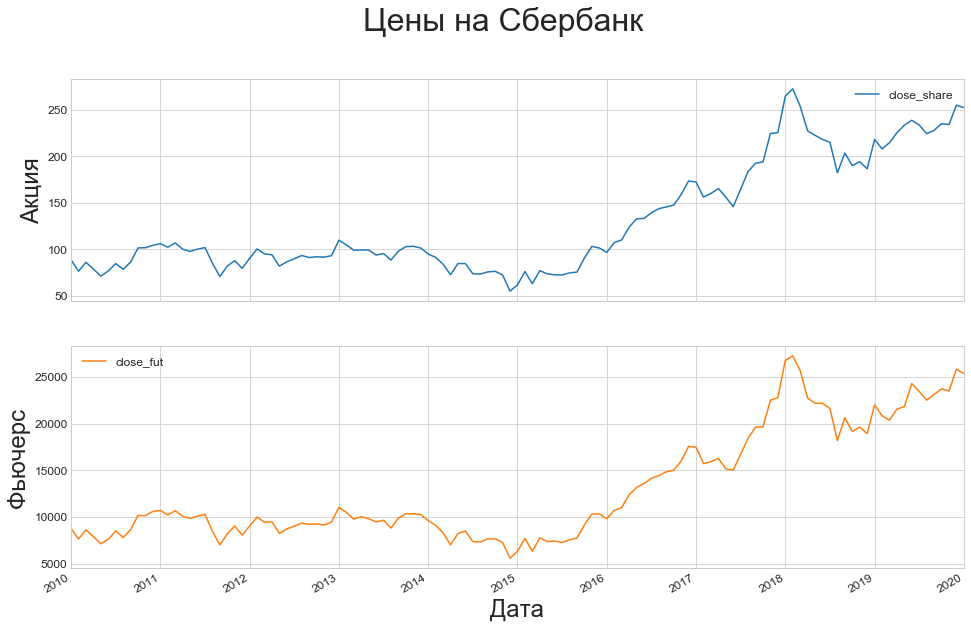

In [3]:
# Устанавливаем стили для графиков.
# plt.style.use('fivethirtyeight')
axes = df.plot(subplots=True, 
               title = f"Цены на {title_name}",
               figsize=(16,10))
axes[1].set_xlabel('Дата')
axes[0].set_ylabel('Акция')
axes[1].set_ylabel('Фьючерс');

## 3. Процентное изменение цены БА для каждого месяца.

Для вычисления процентного изменения за день используем встроенную функцию в *pct_change()*.

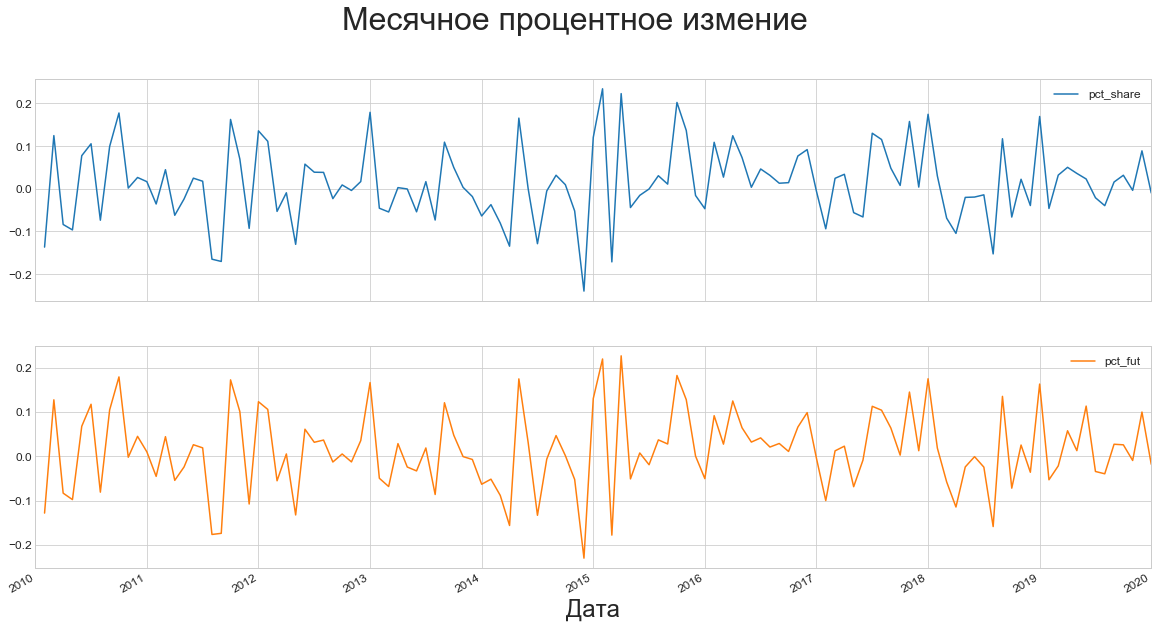

In [4]:
# Вычисляем процентное соотношение
df['pct_share'] = df['close_share'].pct_change()
df['pct_fut'] = df['close_fut'].pct_change()

# Рисуем график
# plt.figure(figsize=(20,10))
df.plot(y=['pct_share', 'pct_fut'], 
        title = 'Месячное процентное измение', 
        subplots=True, 
        figsize=(20, 10))
plt.xlabel('Дата')
plt.show()

**Гистограмма дневной доходности**

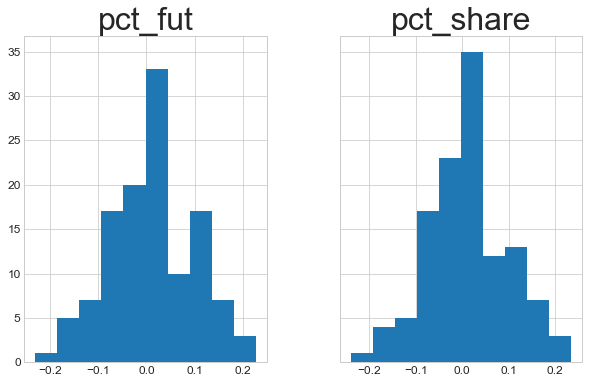

In [5]:
df.hist(column=['pct_share', 'pct_fut'], 
        figsize=(10, 6),
        sharey=True,
        bins=10)
plt.show()

Цена за месяц изменяется в пределах от -20% до 20%.

## 4. Медиана доходности за определенный месяц.

Ценовые графики часто имеют "выбросы" цены, которые смещают среднее значение. Поэтому вместо среднего вычисляем медиану.<br>
Функция для расчета медианы доходности акции и фьючерса. 

In [6]:
def calc_median_return(df, col):
    # Вычисляем изменение цены за день
    day_wise_returns = df.groupby('month')[col]
    
    # Возвращает среднее изменение цены за день (%)
    return (day_wise_returns.median()*100)

# Выводим отсортированные данные по дням
print(calc_median_return(df, 'pct_share').sort_values(ascending=False))
print(calc_median_return(df, 'pct_fut').sort_values(ascending=False))

month
Jan    6.836423
Sep    2.360437
Oct    2.285250
Jul    1.702284
Nov    1.267027
Jun    0.165963
Apr   -0.353213
Dec   -0.607454
Mar   -1.441997
May   -2.224869
Aug   -2.254324
Feb   -3.663206
Name: pct_share, dtype: float64
month
Jan    6.638468
Sep    3.763656
Jun    2.846750
Jul    1.871449
Oct    1.820314
Apr    1.385790
Nov    1.217708
Dec    0.627300
Aug   -2.318831
May   -2.432500
Mar   -3.865780
Feb   -4.766774
Name: pct_fut, dtype: float64


Лучшим месяцем для покупки является Январь и период с Сентября по Ноябрь.

## 5. Доходность за определенный месяц.

Выберем лучший месяц в году и посмотрим на доходность графика, если торговать один раз в году.

In [7]:
month = "Jan"
df[df['month']==month]

,close_share,close_fut,month,pct_share,pct_fut
Date,,,,,
2010-01-01,88.41,8763.0,Jan,NaN,NaN
2011-01-01,105.90,10694.0,Jan,0.016510,0.009821
2012-01-01,90.17,9033.0,Jan,0.135642,0.122949
2013-01-01,109.59,11025.0,Jan,0.179148,0.166173
2014-01-01,94.70,9606.0,Jan,-0.063952,-0.063286
2015-01-01,61.50,6308.0,Jan,0.120219,0.130061
2016-01-01,96.50,9802.0,Jan,-0.047008,-0.050654
2017-01-01,172.20,17470.0,Jan,-0.006061,-0.004729
2018-01-01,264.50,26766.0,Jan,0.174512,0.174772


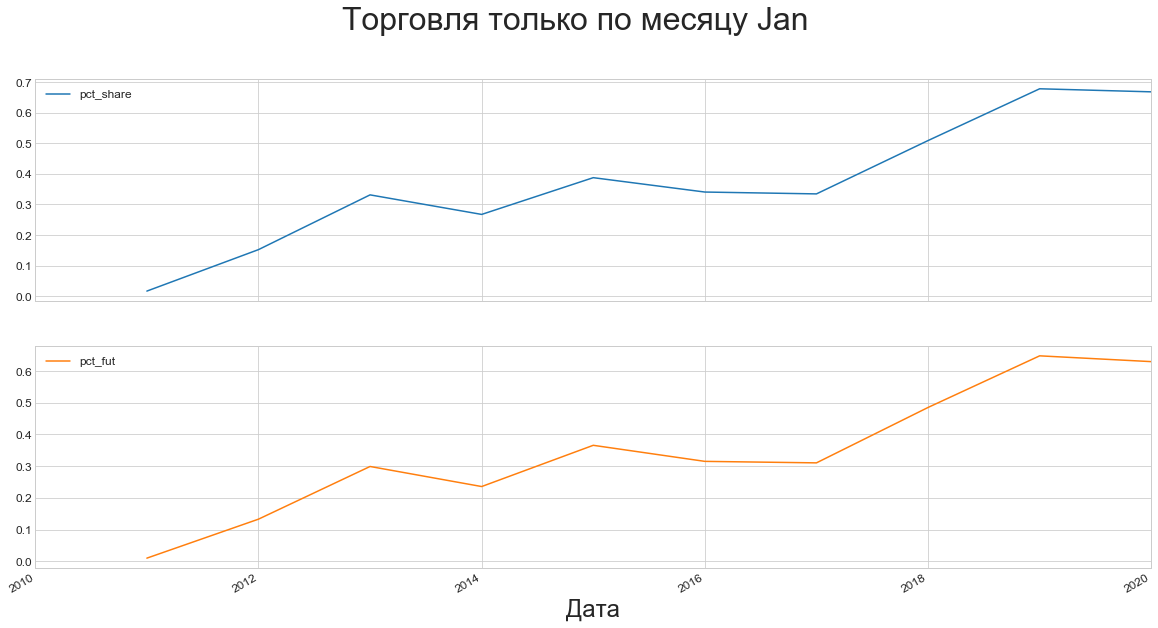

In [8]:
# Рисуем график для определенного дня месяца
df[df['month'] == month].cumsum().plot(y=['pct_share', 'pct_fut'], 
        title = f'Торговля только по месяцу {month}', 
        subplots=True, 
        figsize=(20, 10))
plt.xlabel('Дата')
plt.show()

**Медиана за данный месяц:**

In [9]:
# Медиана за определенный день.
median_day = df[df['month'] == month]['pct_share'].median()

# Медиана за весь период.
median_day_share = df['pct_share'].median()

print('Медиана за {} равна: {:.4%}, а за весь период: {:.4%}'.format(month, median_day, median_day_share))

Медиана за Jan равна: 6.8364%, а за весь период: 0.9097%


Если покупать акции Сбербанка в начале Января и продавать в конце месяца, то есть матемическое преимущество, т.к. этот месяц значительно превосходит в целом!

## 6. Вычисление количества прибыльных и убыточных периодов.

Для подсчета прибыльных и убыточных периодов используется изначальный dataframe *df_share*.  
Сначала проверяем правельность данных. Для примера возьмем последние 12 месяцев.

In [10]:
df_share.tail(12) #Проверка данных по акции. Получены в начале этого файла.

,time,open,high,low,close,vol,month
Date,,,,,,,
2019-02-01,00:00,217.99,220.70,201.10,207.80,1312764610,02
2019-03-01,00:00,208.44,219.25,202.25,214.42,1069818860,03
2019-04-01,00:00,215.05,247.23,215.01,225.17,1564990380,04
2019-05-01,00:00,226.00,237.47,224.15,233.24,1026259830,05
2019-06-01,00:00,231.18,250.65,230.35,238.55,1020679560,06
2019-07-01,00:00,240.98,245.50,228.52,233.49,777998730,07
2019-08-01,00:00,232.15,232.46,212.88,224.20,1022199390,08
2019-09-01,00:00,224.05,237.20,222.05,227.71,795427120,09
2019-10-01,00:00,227.61,242.78,221.87,234.89,893477980,10


Для подсчета прибыльных месяцев создаем новую колонку **positive**. Для подсчета убыточных месяцев создаем - **negative**.  
Если цена закрытия акции выше цены открытия, то в **positive** записываем "1". Если цена закрытия акции ниже цены открытия, то записываем "1" в **negative**.

In [11]:
df_share['positive'] = np.where((df_share.close - df_share.open) > 0, 1, 0)
df_share['negative'] = np.where((df_share.close - df_share.open) < 0, 1, 0)

df_share.tail()

,time,open,high,low,close,vol,month,positive,negative
Date,,,,,,,,,
2019-09-01,00:00,224.05,237.20,222.05,227.71,795427120,09,1,0
2019-10-01,00:00,227.61,242.78,221.87,234.89,893477980,10,1,0
2019-11-01,00:00,235.35,243.74,231.97,233.98,642056610,11,0,1
2019-12-01,00:00,234.59,256.00,229.03,254.75,665341440,12,1,0
2020-01-01,00:00,255.97,270.80,251.40,252.20,745103430,01,0,1


**Сводная таблица:**

In [12]:
df_share.pivot_table(['positive','negative'],['month'], aggfunc='sum')

,negative,positive
month,,
01,4,7
02,6,4
03,5,5
04,5,5
05,6,4
06,5,5
07,3,7
08,5,5
09,2,8


**Из сводной таблицы видно**, что январь только 7 раз был прибыльным, а в сентябре и октябре 8 и 9 прибыльных соответственно. Но в Январе прибыли выше, а убытки ниже этих двух месяцев.  

**Прибыль/убыток за конкретный месяц**.

Чтобы посмотреть в какие года были прибыль и убыток за конкретный месяц, надо переменной *month* в ячейке ниже присвоить этот месяц в формате *мм*, т.е. например январь - "01".

In [13]:
# Анализ определенного месяца
month = "01" # формат мм, т.е. 01-12.
df_share[df_share['month']==month]

,time,open,high,low,close,vol,month,positive,negative
Date,,,,,,,,,
2010-01-01,00:00,86.56,92.49,84.10,88.41,2709780488,01,1,0
2011-01-01,00:00,104.99,110.95,102.50,105.90,2375765759,01,1,0
2012-01-01,00:00,80.12,91.28,80.12,90.17,3961657210,01,1,0
2013-01-01,00:00,96.50,109.64,96.12,109.59,1717876500,01,1,0
2014-01-01,00:00,100.20,102.92,94.40,94.70,1416546260,01,0,1
2015-01-01,00:00,54.03,67.77,53.58,61.50,2689469610,01,1,0
2016-01-01,00:00,101.00,101.78,82.20,96.50,2055444370,01,0,1
2017-01-01,00:00,173.41,181.68,163.34,172.20,988723570,01,0,1
2018-01-01,00:00,226.88,264.79,226.35,264.50,839314400,01,1,0


In [14]:
# df_share.pivot_table(['positive','negative'],['month'], aggfunc='sum').plot.hist()

## 7. Расстояние между High, Open, Low.

При торговле опционами полезно знать, сколько рынок может пройти от момента входа в позицию за конкретный период. Поэтому важно понимать какая разница между *Открытием* и *Максимум/Минимум* в прошлые периоды. Конечно, не обязательно, что рынок повториться, но данная информация помогает принять решения для покупки/продажи опционов.

Вычисляем разницу между открытием, максимум и минимум, делим на цену открытия и записываем в соответствующие столбцы.

In [15]:
df_share['high_open'] = (df_share.high - df_share.open)/df_share.open 
df_share['open_low'] = (df_share.low - df_share.open)/df_share.open 
df_share['high_low'] = (df_share.high - df_share.low)/df_share.open 

df_share.tail()

,time,open,high,low,close,vol,month,positive,negative,high_open,open_low,high_low
Date,,,,,,,,,,,,
2019-09-01,00:00,224.05,237.20,222.05,227.71,795427120,09,1,0,0.058692,-0.008927,0.067619
2019-10-01,00:00,227.61,242.78,221.87,234.89,893477980,10,1,0,0.066649,-0.025219,0.091868
2019-11-01,00:00,235.35,243.74,231.97,233.98,642056610,11,0,1,0.035649,-0.014362,0.050011
2019-12-01,00:00,234.59,256.00,229.03,254.75,665341440,12,1,0,0.091266,-0.023701,0.114967
2020-01-01,00:00,255.97,270.80,251.40,252.20,745103430,01,0,1,0.057936,-0.017854,0.075790


Вычисляем медиану этих соотношений:

In [16]:
high_open = calc_median_return(df_share, 'high_open')
open_low = calc_median_return(df_share, 'open_low')
high_low = calc_median_return(df_share, 'high_low')
# print(calc_mean_return(df_share, 'high-open').sort_values(ascending=False))
# print(calc_mean_return(df_share, 'open-low').sort_values(ascending=True))
# print(calc_mean_return(df_share, 'high-low').sort_values(ascending=False))

diff_median = pd.DataFrame({'high_open': high_open, 'open_low': open_low, 'high_low': high_low})
print(diff_median)

       high_open  open_low   high_low
month                                
01      6.850739 -1.785365  13.929106
02      2.903533 -7.070787  11.845046
03      4.789494 -6.971309  11.688252
04      4.710173 -5.805298  14.695308
05      5.533156 -4.952324  13.343330
06      4.727111 -5.926267  11.756933
07      7.334447 -4.451856  12.287331
08      3.214554 -8.409091  12.589213
09      7.331084 -1.460792  10.077089
10      5.537934 -2.207948   9.031011
11      6.016940 -3.187642  10.773220
12      3.283578 -3.711964  10.308273


Интересно, что в **Январе и Сентябре** цена до Максимума относительно открытия проходит значительно больше, чем до Минимума. А в **Феврале и Августе** наоборот.

In [17]:
#Анализ определенного столбца
columns_to_show = ['high_open','open_low','high_low']
df_share[df_share['month']==month][columns_to_show].describe()

,high_open,open_low,high_low
count,11.000000,11.000000,11.000000
mean,0.102989,-0.035334,0.138322
std,0.075624,0.054241,0.057904
min,0.007723,-0.186139,0.075790
25%,0.052229,-0.043152,0.090978
50%,0.068507,-0.017854,0.139291
75%,0.153192,-0.003137,0.170833
max,0.254303,0.000000,0.262632


Столкнулся с неожиданностью.  
Как видно в Разделе 5 (out[7]), январь очень хороший месяц для покупок Сбербанка. Доходности более 10% не редкость, а падение было только в январе 2014 и 2016гг всего на 6% и 5% соответственно. Но из таблицы выше видно, что минимумальное значение равно в "январях" -18,6%. Т.е. рынок падал на эту величину!  
Чтобы увидеть этот год использую следующую ячейку:

In [18]:
df_share[df_share['month']==month][columns_to_show]

,high_open,open_low,high_low
Date,,,
2010-01-01,0.068507,-0.028420,0.096927
2011-01-01,0.056767,-0.023717,0.080484
2012-01-01,0.139291,0.000000,0.139291
2013-01-01,0.136166,-0.003938,0.140104
2014-01-01,0.027146,-0.057884,0.085030
2015-01-01,0.254303,-0.008329,0.262632
2016-01-01,0.007723,-0.186139,0.193861
2017-01-01,0.047690,-0.058070,0.105761
2018-01-01,0.167093,-0.002336,0.169429


Видно, что в январе 2016 года рынок падал до -18,6%, но потом отрос и закрылся в убытке в -4,7%.

**Агрегированные функции**

Вычисление сразу нескольких обобщающих функций (медиана, среднее, стандартное отклонение, минимум, максимум):

In [19]:
# Анализ по всем месяцам
df_share.groupby(df_share.month)[columns_to_show].agg([np.median, np.mean, np.std, np.min, np.max])

high_open                                          open_low            \
         median      mean       std      amin      amax    median      mean   
month                                                                         
01     0.068507  0.102989  0.075624  0.007723  0.254303 -0.017854 -0.035334   
02     0.029035  0.065898  0.073965  0.008455  0.239355 -0.070708 -0.072405   
03     0.047895  0.055930  0.047055  0.014540  0.180779 -0.069713 -0.080864   
04     0.047102  0.079744  0.075928  0.007855  0.244395 -0.058053 -0.081187   
05     0.055332  0.075637  0.064753  0.002703  0.217113 -0.049523 -0.071080   
06     0.047271  0.057705  0.057479  0.005734  0.200625 -0.059263 -0.063339   
07     0.073344  0.075781  0.043505  0.018757  0.154461 -0.044519 -0.051836   
08     0.032146  0.044432  0.041197  0.001335  0.125657 -0.084091 -0.099036   
09     0.073311  0.081680  0.045161  0.010626  0.165430 -0.014608 -0.043355   
10     0.055379  0.100211  0.096992  0.007237  0.271943 -0.022079 -0.039637   
11     0.060169  0.086207  0.073636  0.011354  0.226593 -0.031876 -0.041861   
12     0.032836  0.050597  0.045858  0.005529  0.159825 -0.037120 -0.076491   

                                     high_low                                \
            std      amin      amax    median      mean       std      amin   
month                                                                         
01     0.054241 -0.186139  0.000000  0.139291  0.138322  0.057904  0.075790   
02     0.043805 -0.164137 -0.006352  0.118450  0.138303  0.058133  0.078945   
03     0.080357 -0.235280 -0.003766  0.116883  0.136794  0.062402  0.068979   
04     0.079680 -0.244874 -0.000186  0.146953  0.160931  0.066967  0.074319   
05     0.072913 -0.202499 -0.003568  0.133433  0.146717  0.068584  0.058938   
06     0.038184 -0.129156 -0.003590  0.117569  0.121044  0.050610  0.071327   
07     0.042514 -0.149082 -0.002099  0.122873  0.127617  0.041007  0.070462   
08     0.080565 -0.266996 -0.001389  0.125892  0.143468  0.062163  0.080929   
09     0.067141 -0.220543 -0.001946  0.100771  0.125034  0.060280  0.067619   
10     0.047365 -0.134377  0.000000  0.090310  0.139849  0.112349  0.041607   
11     0.032310 -0.086461 -0.006537  0.107732  0.128067  0.062399  0.050011   
12     0.102275 -0.343302 -0.005092  0.103083  0.127088  0.098654  0.050194   

                 
           amax  
month            
01     0.262632  
02     0.273226  
03     0.251785  
04     0.281506  
05     0.264175  
06     0.243646  
07     0.202397  
08     0.276598  
09     0.231169  
10     0.380925  
11     0.233130  
12     0.379190

Либо только одна функция, например, медиана.

In [20]:
# Группировка через сводные таблицы.
df_share.pivot_table(['high_open','open_low','high_low'],['month'], aggfunc='median')

,high_low,high_open,open_low
month,,,
01,0.139291,0.068507,-0.017854
02,0.118450,0.029035,-0.070708
03,0.116883,0.047895,-0.069713
04,0.146953,0.047102,-0.058053
05,0.133433,0.055332,-0.049523
06,0.117569,0.047271,-0.059263
07,0.122873,0.073344,-0.044519
08,0.125892,0.032146,-0.084091
09,0.100771,0.073311,-0.014608


## 8. Уровни изменений цены.

Рассмотрим как часто цена проходит то или иное расстояние за месяц.  
За ориентир возьмем четыре разницы между открытием и максимум/минимум:
- 2,5 рубля
- 5 рублей
- 10 рублей
- 15 рублей  

Создаем соответствующие столбцы и записываем в них "1", если цена проходила необходимое расстояние.  
Суммируем "единицы" и делим на общее количество наблюдений.

In [21]:
# Создание столбцов и запись значений.
df_share['ho_or_ol_2.5'] = np.where(( ((df_share.high - df_share.open) > 2.5) | ((df_share.open - df_share.low) > 2.5)), 1, 0)
df_share['ho_or_ol_5'] = np.where(( ((df_share.high - df_share.open) > 5) | ((df_share.open - df_share.low) > 5)), 1, 0)
df_share['ho_or_ol_10'] = np.where(( ((df_share.high - df_share.open) > 10) | ((df_share.open - df_share.low) > 10)), 1, 0)
df_share['ho_or_ol_15'] = np.where(( ((df_share.high - df_share.open) > 15) | ((df_share.open - df_share.low) > 15)), 1, 0)

# Подсчет количества "единиц" в общем количестве случаев.
two_five = df_share['ho_or_ol_2.5'].sum()/df_share['ho_or_ol_2.5'].count()
five = df_share['ho_or_ol_5'].sum()/df_share['ho_or_ol_5'].count()
ten = df_share['ho_or_ol_10'].sum()/df_share['ho_or_ol_10'].count()
fifteen = df_share['ho_or_ol_15'].sum()/df_share['ho_or_ol_15'].count()

print('Достижение цены вверх или вниз 2.5 рубля = {:.2%}, 5 рублей = {:.2%}, 10 рублей = {:.2%}, 15 рублей = {:.2%}'.
      format(two_five, five, ten, fifteen))

Достижение цены вверх или вниз 2.5 рубля = 100.00%, 5 рублей = 90.91%, 10 рублей = 57.02%, 15 рублей = 33.88%


Строим диаграммы "размаха" цены по месяцам:

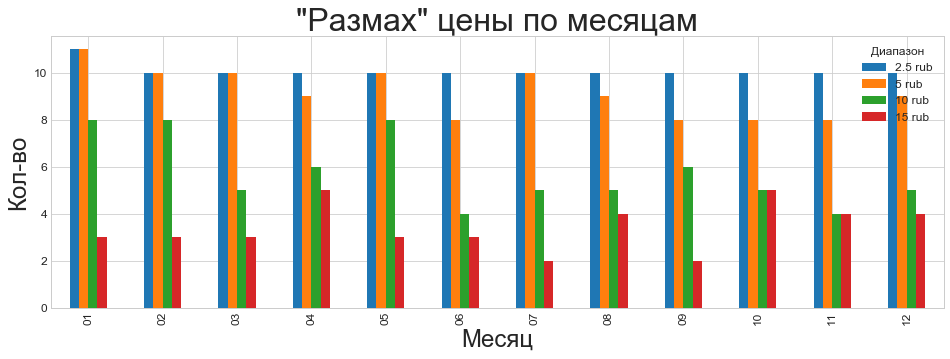

In [22]:
# Столбцы для графика
columns_to_show2 = ['ho_or_ol_2.5','ho_or_ol_5','ho_or_ol_10', 'ho_or_ol_15']

df_share.groupby(df_share['month'])[columns_to_show2].sum().plot(kind='bar',
                                                                title='"Размах" цены по месяцам',
                                                                figsize =(16, 5))

plt.legend({'2.5 rub':'ho_or_ol_2.5','5 rub':'ho_or_ol_5','10 rub':'ho_or_ol_10', '15 rub': 'ho_or_ol_15'}, 
           title='Диапазон', fontsize=small, title_fontsize=small)
plt.xlabel('Месяц')
plt.ylabel('Кол-во');

Слабей всего цена проходить расстояния более 10 рублей в июне и июле. Когда и волатильность снижается.

**Вероятность изменения цены**

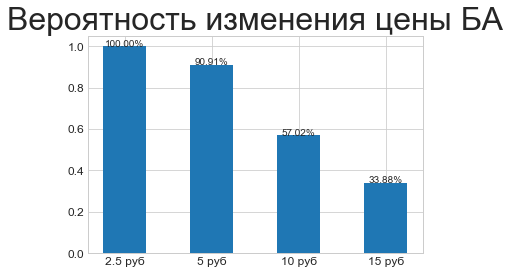

In [23]:
D = {'2.5 руб': two_five,'5 руб':five, '10 руб':ten, '15 руб': fifteen}
plt.bar(range(len(D)), list(D.values()), align='center', width=0.5)

plt.xticks(range(len(D)), list(D.keys()))
plt.title('Вероятность изменения цены БА')

count = 0
for k, v in D.items():
    plt.annotate("{:.2%}".format(v), xy=(count, v), ha='center')
    count += 1  

plt.show()

Как видно из диаграммы выше вероятность того, что цена пройдет **более 5 рублей** в одну из сторон составляет **90,91%**.

Знание с какой частотой цена изменяется на определенное расстояние за месяц можно исползовать в торговле опционов. Например, для открытия вертикальных спредов.

**Вывод:**  
- Прибыльные месяцы для акций Сбербанка: Январь, Сентябрь, Октябрь, Ноябрь.  
- За календарный месяц цена с вероятностью 90,91% волатильна более 5 рублей.